In [1]:
#!python -m  pip install KalmanFilter

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from pykalman import KalmanFilter

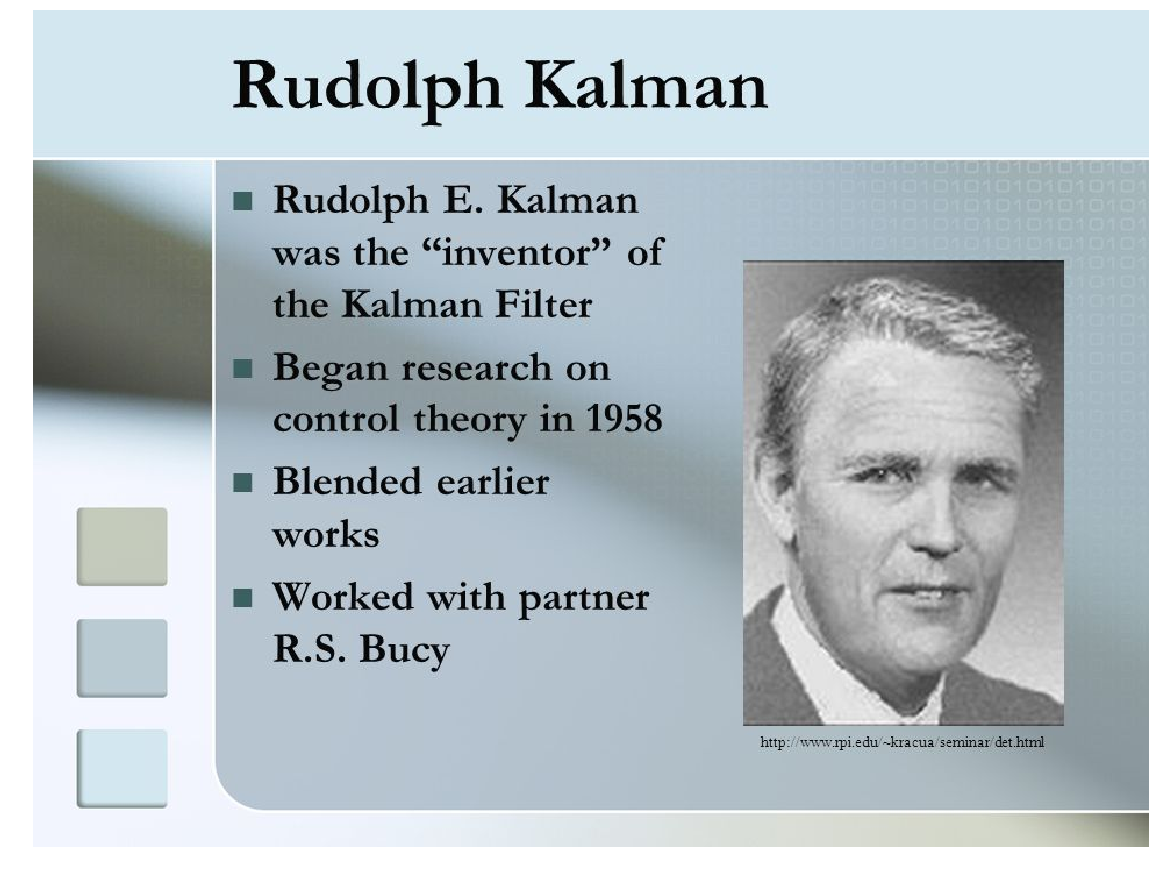

In [3]:
plt.figure(figsize = (20,20))
pic=plt.imread("C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\Technical analysis\\slide_4.jpg")
plt.imshow(pic)
plt.axis('off')
plt.show()

In [4]:
start_date='2022-02-01'
end_date='2022-12-31'
stocks=['GOOG','MSFT']
df=yf.download(stocks,start=start_date,end=end_date)['Adj Close']
df

[*********************100%***********************]  2 of 2 completed


,GOOG,MSFT
Date,,
2022-01-31,135.698502,305.385345
2022-02-01,137.878494,303.205200
2022-02-02,148.036499,307.820679
2022-02-03,142.650497,295.830322
2022-02-04,143.016006,300.436005
...,...,...
2022-12-23,89.809998,236.631790
2022-12-27,87.930000,234.877350
2022-12-28,86.459999,232.468735


In [5]:
df

,GOOG,MSFT
Date,,
2022-01-31,135.698502,305.385345
2022-02-01,137.878494,303.205200
2022-02-02,148.036499,307.820679
2022-02-03,142.650497,295.830322
2022-02-04,143.016006,300.436005
...,...,...
2022-12-23,89.809998,236.631790
2022-12-27,87.930000,234.877350
2022-12-28,86.459999,232.468735


In [6]:
GOOG = df['GOOG'].values.reshape(-1, 1)
MSFT = df['MSFT'].values.reshape(-1, 1)
GOOG

array([[135.69850159],
       [137.87849426],
       [148.03649902],
       [142.65049744],
       [143.01600647],
       [138.93800354],
       [139.21299744],
       [141.45300293],
       [138.60249329],
       [134.13000488],
       [135.30000305],
       [136.42550659],
       [137.48750305],
       [132.3085022 ],
       [130.46749878],
       [129.40249634],
       [127.58499908],
       [132.67349243],
       [134.51950073],
       [134.89100647],
       [134.16799927],
       [134.75149536],
       [134.30799866],
       [132.12199402],
       [126.46450043],
       [127.27850342],
       [133.86599731],
       [132.68200684],
       [130.47549438],
       [126.74099731],
       [129.6605072 ],
       [133.69050598],
       [134.60049438],
       [136.80149841],
       [136.47850037],
       [140.27749634],
       [138.50349426],
       [141.31199646],
       [141.52149963],
       [141.94999695],
       [143.25      ],
       [142.64450073],
       [139.64950562],
       [140

In [7]:
np.vstack([df['GOOG'], 
np.ones(df['GOOG'].shape)]).T[:, np.newaxis]

array([[[135.69850159,   1.        ]],

       [[137.87849426,   1.        ]],

       [[148.03649902,   1.        ]],

       [[142.65049744,   1.        ]],

       [[143.01600647,   1.        ]],

       [[138.93800354,   1.        ]],

       [[139.21299744,   1.        ]],

       [[141.45300293,   1.        ]],

       [[138.60249329,   1.        ]],

       [[134.13000488,   1.        ]],

       [[135.30000305,   1.        ]],

       [[136.42550659,   1.        ]],

       [[137.48750305,   1.        ]],

       [[132.3085022 ,   1.        ]],

       [[130.46749878,   1.        ]],

       [[129.40249634,   1.        ]],

       [[127.58499908,   1.        ]],

       [[132.67349243,   1.        ]],

       [[134.51950073,   1.        ]],

       [[134.89100647,   1.        ]],

       [[134.16799927,   1.        ]],

       [[134.75149536,   1.        ]],

       [[134.30799866,   1.        ]],

       [[132.12199402,   1.        ]],

       [[126.46450043,   1.        ]],



In [8]:
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)
obs_mat = np.vstack([df['GOOG'], 
np.ones(df['GOOG'].shape)]).T[:, np.newaxis]
kf = KalmanFilter(
    n_dim_obs=1,
    n_dim_state=2,
    initial_state_mean=np.zeros(2),
    initial_state_covariance=np.ones((2, 2)),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat,
    observation_covariance=1.0,
    transition_covariance=trans_cov)
    
state_means, state_covs = kf.filter(df['MSFT'].values)

In [9]:
state_means

array([[2.23388699, 2.23388699],
       [2.20600053, 2.210333  ],
       [2.14111828, 2.16957813],
       [2.10929041, 2.15597169],
       [2.10050038, 2.15349076],
       [2.10441048, 2.15421425],
       [2.11448234, 2.15544321],
       [2.12559927, 2.15634378],
       [2.12602947, 2.15636751],
       [2.132083  , 2.15660411],
       [2.12970302, 2.15653793],
       [2.13574742, 2.15666155],
       [2.1329933 , 2.15661854],
       [2.13733381, 2.15668006],
       [2.14323355, 2.15675367],
       [2.15250096, 2.1568575 ],
       [2.14997904, 2.15683053],
       [2.15645922, 2.15688147],
       [2.15729552, 2.15688737],
       [2.1595243 , 2.15690307],
       [2.15528736, 2.15687142],
       [2.16250666, 2.15692348],
       [2.15891897, 2.15689663],
       [2.15340787, 2.15684967],
       [2.15333748, 2.15684888],
       [2.14106426, 2.15673064],
       [2.1282822 , 2.15666057],
       [2.11922545, 2.15659895],
       [2.11138503, 2.15653355],
       [2.11716474, 2.15659401],
       [2.

In [10]:
import pandas as pd

In [11]:
state_means[:,1][-1:]+state_means[:,0][-1:]*df['GOOG'][-1:]

Date
2022-12-30    237.300667
Name: GOOG, dtype: float64

In [12]:
df['MSFT'][-1:]

Date
2022-12-30    237.712219
Name: MSFT, dtype: float64